In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('ic.jpg', cv2.IMREAD_GRAYSCALE)

/tmp/ipykernel_11994/1481075076.py:29: RuntimeWarning: invalid value encountered in cast
  contraharmonic_mean_neg = np.clip(contraharmonic_mean_neg, 0, 255).astype(np.uint8)


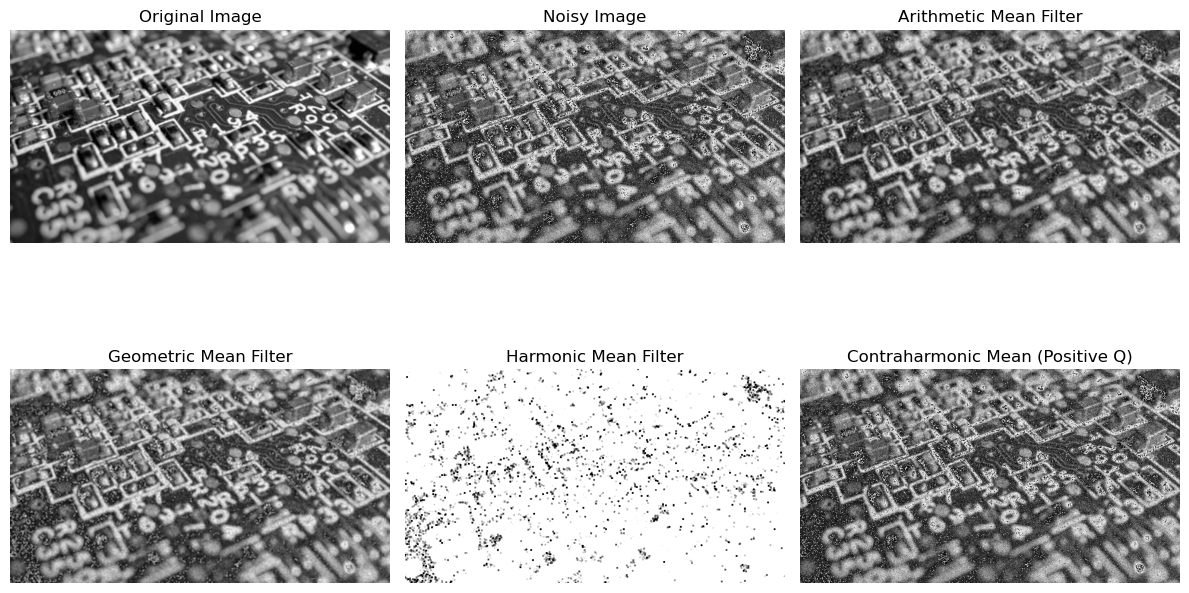

In [23]:


# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Add some noise to the image
    noisy_image = image + np.random.normal(0, 25, image.shape).astype(np.uint8)

    # Convert the image to floating-point format
    noisy_image_float = noisy_image.astype(np.float32)

    # Apply mean filters
    kernel_size = 3  # Change the kernel size as needed
    arithmetic_mean = cv2.blur(noisy_image, (kernel_size, kernel_size))

    # Geometric Mean Filter
    geometric_mean = cv2.pow(cv2.blur(cv2.pow(noisy_image_float, 2.0), (kernel_size, kernel_size)).astype(np.float32), 1/2.0)
    geometric_mean = np.clip(geometric_mean, 0, 255).astype(np.uint8)

    # Harmonic Mean Filter
    harmonic_mean = cv2.divide((kernel_size * kernel_size), cv2.blur(cv2.divide(1.0, noisy_image_float + 1e-6), (kernel_size, kernel_size)) + 1e-6)
    harmonic_mean = np.clip(harmonic_mean, 0, 255).astype(np.uint8)

    # Contraharmonic Mean Filters
    contraharmonic_mean_q_positive = 1.5
    contraharmonic_mean_q_negative = -1.5
    contraharmonic_mean_pos = cv2.divide(cv2.pow(noisy_image_float, contraharmonic_mean_q_positive + 1), cv2.pow(noisy_image_float, contraharmonic_mean_q_positive) + 1e-6)
    contraharmonic_mean_neg = cv2.divide(cv2.pow(noisy_image_float, contraharmonic_mean_q_negative + 1), cv2.pow(noisy_image_float, contraharmonic_mean_q_negative) + 1e-6)
    contraharmonic_mean_pos = np.clip(contraharmonic_mean_pos, 0, 255).astype(np.uint8)
    contraharmonic_mean_neg = np.clip(contraharmonic_mean_neg, 0, 255).astype(np.uint8)

    # Display the images using Matplotlib
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(arithmetic_mean, cmap='gray')
    plt.title('Arithmetic Mean Filter')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(geometric_mean, cmap='gray')
    plt.title('Geometric Mean Filter')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(harmonic_mean, cmap='gray')
    plt.title('Harmonic Mean Filter')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(contraharmonic_mean_pos, cmap='gray')
    plt.title('Contraharmonic Mean (Positive Q)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


ValueError: num must be 1 <= num <= 6, not 7

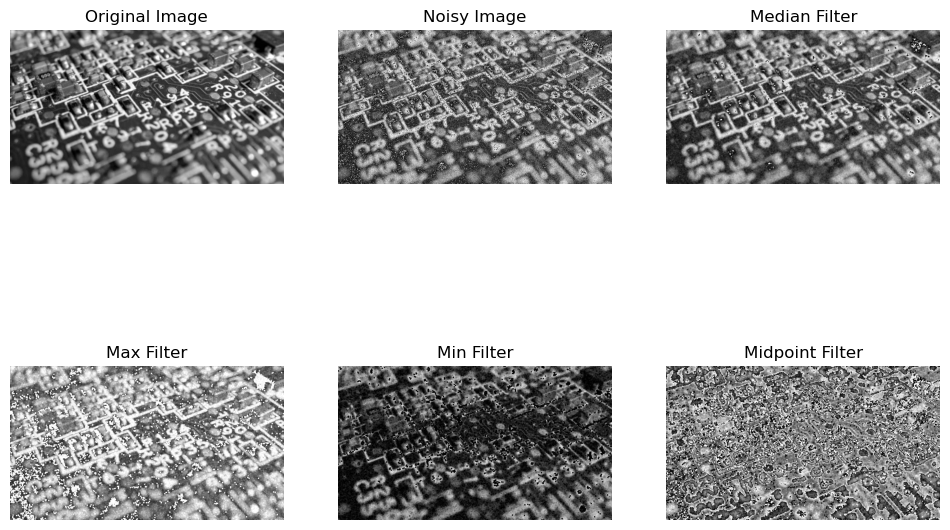

In [24]:

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Add some noise to the image
    noisy_image = image + np.random.normal(0, 25, image.shape).astype(np.uint8)

    # Apply order-statistics filters
    kernel_size = 3  # Change the kernel size as needed
    median_filtered = cv2.medianBlur(noisy_image, kernel_size)
    max_filtered = cv2.dilate(noisy_image, np.ones((kernel_size, kernel_size), np.uint8))
    min_filtered = cv2.erode(noisy_image, np.ones((kernel_size, kernel_size), np.uint8))
    midpoint_filtered = (max_filtered + min_filtered) // 2
    alpha = 0.2  # Change the alpha value (proportion to trim) as needed
    alpha_trimmed_filtered = cv2.boxFilter(noisy_image, -1, (kernel_size, kernel_size), normalize=False)
    alpha_trimmed_filtered = (alpha_trimmed_filtered - alpha * max_filtered - (1 - alpha) * min_filtered) / (kernel_size**2 - 2 * alpha * kernel_size - 1)

    # Display the images using Matplotlib
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(median_filtered, cmap='gray')
    plt.title('Median Filter')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(max_filtered, cmap='gray')
    plt.title('Max Filter')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(min_filtered, cmap='gray')
    plt.title('Min Filter')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(midpoint_filtered, cmap='gray')
    plt.title('Midpoint Filter')
    plt.axis('off')

    plt.subplot(2, 3, 7)
    plt.imshow(alpha_trimmed_filtered, cmap='gray')
    plt.title('Alpha-trimmed Mean Filter')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


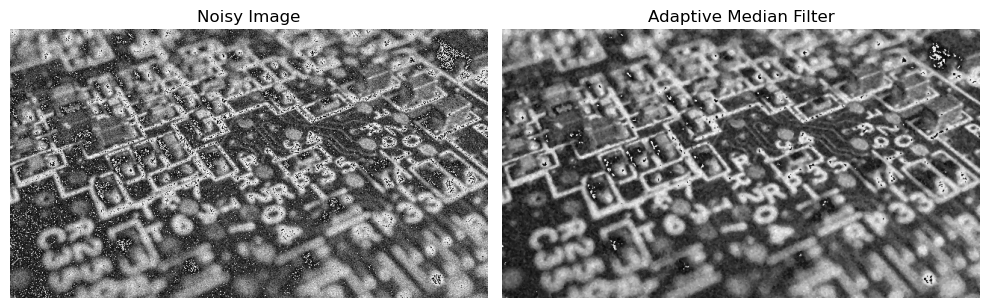

In [25]:

def adaptive_median_filter(img, window_size):
    pad = window_size // 2
    padded_img = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REFLECT)

    result = np.zeros_like(img)

    for i in range(pad, img.shape[0] + pad):
        for j in range(pad, img.shape[1] + pad):
            window = padded_img[i - pad:i + pad + 1, j - pad:j + pad + 1]
            filtered_pixel = apply_adaptive_median(window)
            result[i - pad, j - pad] = filtered_pixel

    return result

def apply_adaptive_median(window):
    window_size = window.shape[0]

    for window_size in range(3, window_size + 1, 2):
        window_median = np.median(window)
        window_min = np.min(window)
        window_max = np.max(window)

        if window_min < window_median < window_max:
            return window_median
        else:
            window = window[1:-1, 1:-1]

    return window_median

# Read the image

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Add some noise to the image
    noisy_image = image + np.random.normal(0, 25, image.shape).astype(np.uint8)

    # Apply the adaptive median filter
    window_size = 3  # Initial window size
    adaptive_median = adaptive_median_filter(noisy_image, window_size)

    # Display the images using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(adaptive_median, cmap='gray')
    plt.title('Adaptive Median Filter')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
